# **This notebook will be used for initial data exploration**

In [41]:
# Import needed packages
import types
import pandas as pd
import matplotlib.pyplot as plt
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()


gauth.LoadCredentialsFile("credentials.txt")
if gauth.credentials is None:
    gauth.credentials = GoogleCredentials.get_application_default()
elif gauth.access_token_expired:
    gauth.Refresh()
else:
    gauth.Authorize()

gauth.SaveCredentialsFile("credentials.txt")


drive = GoogleDrive(gauth)

**Import the data. The source of the data is: https://www.kaggle.com/divyansh22/flight-delay-prediction**

In [42]:
link = 'https://drive.google.com/file/d/1ZxGBlEzdXLkqtPdiRPARH2jmij_0JeTW/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Jan_2019_ontime.csv')  
df_data_1 = pd.read_csv('Jan_2019_ontime.csv')
df_data_1.head()

1ZxGBlEzdXLkqtPdiRPARH2jmij_0JeTW


,Year,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,2019,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0,0,300
1,2019,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0,0,596
2,2019,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0,0,229
3,2019,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0,0,223
4,2019,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0,0,579


In [43]:
link = 'https://drive.google.com/file/d/17Gy25By21M0OHN9x-ZJYKDPYBgv1dswx/view?usp=sharing'
fluff, id  = link.split('d/')
id, fluff = id.split('/view')
print (id) # Verify that you have everything after '='
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Jan_2020_ontime.csv')  
df_data_2 = pd.read_csv('Jan_2020_ontime.csv')
df_data_2.head()

17Gy25By21M0OHN9x-ZJYKDPYBgv1dswx


,Year,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,2020,1,3,EV,20366,EV,N48901,4397,13930,1393007,ORD,11977,1197705,GRB,1003.0,0.0,1000-1059,1117.0,0.0,0,0,174
1,2020,1,3,EV,20366,EV,N16976,4401,15370,1537002,TUL,13930,1393007,ORD,1027.0,0.0,1000-1059,1216.0,0.0,0,0,585
2,2020,1,3,EV,20366,EV,N12167,4404,11618,1161802,EWR,15412,1541205,TYS,1848.0,0.0,1800-1859,2120.0,0.0,0,0,631
3,2020,1,3,EV,20366,EV,N14902,4405,10781,1078105,BTR,12266,1226603,IAH,1846.0,0.0,1800-1859,2004.0,0.0,0,0,253
4,2020,1,3,EV,20366,EV,N606UX,4407,14524,1452401,RIC,12266,1226603,IAH,1038.0,0.0,1000-1059,1330.0,0.0,0,0,1157


In [44]:
# Mount google drive for upload later
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


**Append the two datasets for 2019 and 2020 into one dataframe**

In [45]:
df = df_data_1.append(df_data_2)
df.head()

,Year,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE
0,2019,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,1039707,ATL,601.0,0.0,0600-0659,722.0,0.0,0,0,300
1,2019,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,1119302,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0,0,596
2,2019,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,1119302,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0,0,229
3,2019,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,1039707,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0,0,223
4,2019,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,1177801,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0,0,579


**Let's look at the number of flights by year**

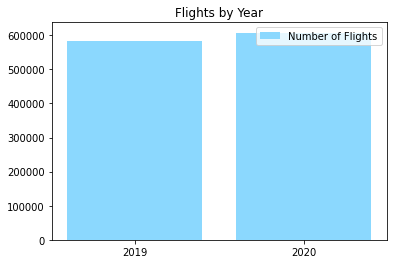

In [46]:
# group by year
year = df[["Year","DEST"]].groupby(['Year'],as_index=False).count()
x = year["Year"].to_numpy()
y = year["DEST"].to_numpy()

# plot
fig, ax = plt.subplots()
chart1 = ax.bar(x, y, 0.8, label='Number of Flights',color = "#8bd8fe")
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()
ax.set_title('Flights by Year')
plt.show()

**Let's look at the number of flights by day of week**

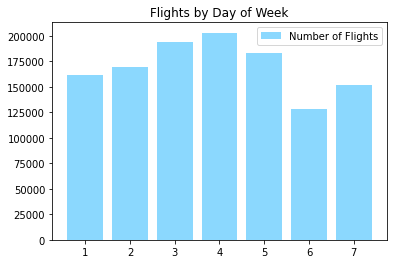

In [47]:
# group by day of week
dayweek = df[["DAY_OF_WEEK","DEST"]].groupby(['DAY_OF_WEEK'],as_index=False).count()
x = dayweek["DAY_OF_WEEK"].to_numpy()
y = dayweek["DEST"].to_numpy()

# plot
fig, ax = plt.subplots()
chart1 = ax.bar(x, y, 0.8, label='Number of Flights',color = "#8bd8fe")
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()
ax.set_title('Flights by Day of Week')
plt.show()

**Let's look at the number of flights by day of month**

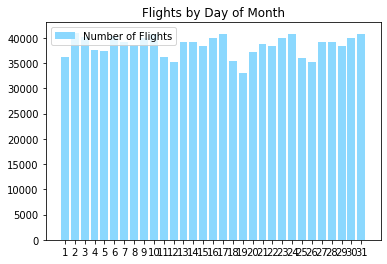

In [48]:
# group by day of month
daymon = df[["DAY_OF_MONTH","DEST"]].groupby(['DAY_OF_MONTH'],as_index=False).count()
x = daymon["DAY_OF_MONTH"].to_numpy()
y = daymon["DEST"].to_numpy()

# plot
fig, ax = plt.subplots()
chart1 = ax.bar(x, y, 0.8, label='Number of Flights',color = "#8bd8fe")
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()
ax.set_title('Flights by Day of Month')
plt.show()

**Let's look at the number of flights by carrier**

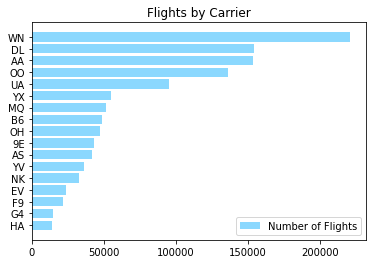

In [62]:
# group by carrier
carrier = df[["OP_UNIQUE_CARRIER","DEST"]].groupby(['OP_UNIQUE_CARRIER'],as_index=False).count().sort_values(by = "DEST",ascending = True)
x = carrier["OP_UNIQUE_CARRIER"].to_numpy()
y = carrier["DEST"].to_numpy()

# plot
fig, ax = plt.subplots()
chart1 = ax.barh(x, y, 0.8, label='Number of Flights',color = "#8bd8fe")
ax.legend()
ax.set_title('Flights by Carrier')
plt.show()

**Let's look at the number of flights by distance**

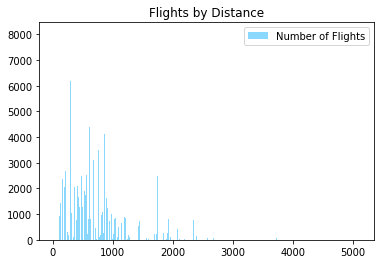

count    1512.000000
mean      787.917328
std       889.987487
min         1.000000
25%       153.500000
50%       470.000000
75%      1086.500000
max      8062.000000
Name: DEST, dtype: float64

In [50]:
# group by distance
dist = df[["DISTANCE","DEST"]].groupby(['DISTANCE'],as_index=False).count()
x = dist["DISTANCE"].to_numpy()
y = dist["DEST"].to_numpy()

# plot
fig, ax = plt.subplots()
chart1 = ax.bar(x, y, label='Number of Flights',color = "#8bd8fe")
ax.legend()
ax.set_title('Flights by Distance')
plt.show()

# show descriptive statistics
dist["DEST"].describe()

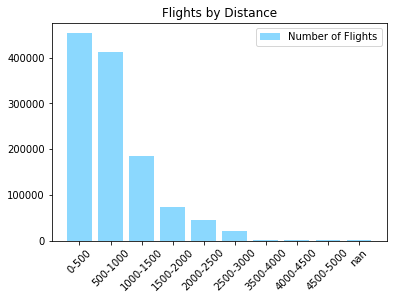

In [51]:
bins = pd.IntervalIndex.from_tuples([(0000, 500), (500, 1000), (1000, 1500), (1500, 2000), (2000, 2500), (2500, 3000), (3500, 4000), (4000, 4500), (4500, 5000)])
df["bins"] = pd.cut(df["DISTANCE"], bins)
df["bins"] = df["bins"].astype('str').replace('\(', '', regex=True).replace('\]', '', regex=True).replace('\,', '-', regex=True).replace('\.0', '', regex=True).replace(' ', '', regex=True)

# group by distance
dist = df[["bins","DEST"]].groupby(['bins'],as_index=False).count()
dist["bins"]=  pd.Categorical(dist['bins'], ["0-500", "500-1000", "1000-1500","1500-2000","2000-2500","2500-3000","3000-3500","3500-4000","4000-4500","4500-5000"])
dist = dist.sort_values("bins")
x = dist["bins"].to_numpy().astype('str')
y = dist["DEST"].to_numpy()

# plot
fig, ax = plt.subplots()
chart1 = ax.bar(x, y, label='Number of Flights',color = "#8bd8fe")
ax.set_xticklabels(x,rotation=45)
ax.legend()
ax.set_title('Flights by Distance')
plt.show()



**Let's look at the number of flights by hour of the day**

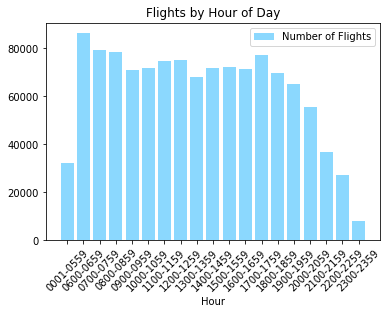

In [60]:
# group by hour
hour = df[["DEP_TIME_BLK","DEST"]].groupby(['DEP_TIME_BLK'],as_index=False).count()
x = hour["DEP_TIME_BLK"].to_numpy()
y = hour["DEST"].to_numpy()

# plot
fig, ax = plt.subplots()
chart1 = ax.bar(x, y, label='Number of Flights',color = "#8bd8fe")
ax.set_xticklabels(x,rotation=45)
ax.legend()
ax.set_title('Flights by Hour of Day')
ax.set_xlabel('Hour')
plt.show()

**Let's look at the number of flights by departure delay or not**

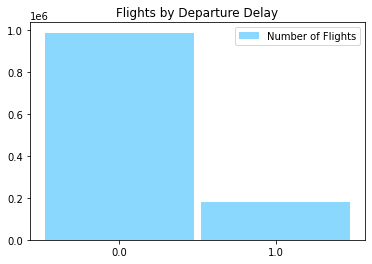

In [53]:
# group by departure delay flag
depdel = df[["DEP_DEL15","DEST"]].groupby(['DEP_DEL15'],as_index=False).count()
x = depdel["DEP_DEL15"].to_numpy()
y = depdel["DEST"].to_numpy()

# plot
fig, ax = plt.subplots()
chart1 = ax.bar(x, y, 0.95, label='Number of Flights',color = "#8bd8fe")
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()
ax.set_title('Flights by Departure Delay')
plt.show()

**Let's look at the number of flights by arrival delay or not**

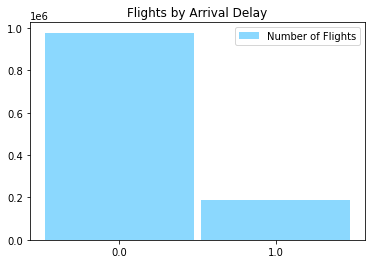

In [54]:
# group by arrival delay flag
arrdel = df[["ARR_DEL15","DEST"]].groupby(['ARR_DEL15'],as_index=False).count()
x = arrdel["ARR_DEL15"].to_numpy()
y = arrdel["DEST"].to_numpy()

# plot
fig, ax = plt.subplots()
chart1 = ax.bar(x, y, 0.95, label='Number of Flights',color = "#8bd8fe")
ax.set_xticks(x)
ax.set_xticklabels(x)
ax.legend()
ax.set_title('Flights by Arrival Delay')
plt.show()

**Let's look at the number of flights by origin**

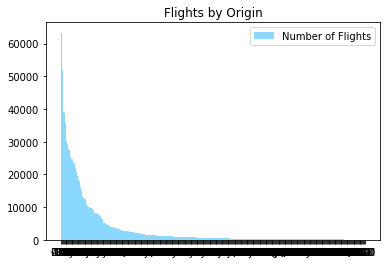

In [55]:
# group by origin
ori = df[["ORIGIN","Year"]].groupby(['ORIGIN'],as_index=False).count().sort_values(by = "Year",ascending = False)
x = ori["ORIGIN"].astype('str').to_numpy()
y = ori["Year"].to_numpy()

# plot
fig, ax = plt.subplots()
chart1 = ax.bar(x, y, 1, label='Number of Flights',color = "#8bd8fe")
ax.legend()
ax.set_title('Flights by Origin')
plt.show()

**Let's look at the number of flights by destination**

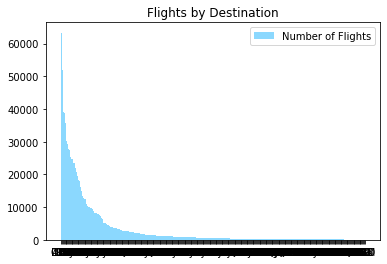

In [56]:
# group by destination
destin = df[["DEST","Year"]].groupby(['DEST'],as_index=False).count().sort_values(by = "Year",ascending = False)
x = destin["DEST"].astype('str').to_numpy()
y = destin["Year"].to_numpy()

# plot
fig, ax = plt.subplots()
chart1 = ax.bar(x, y, 1, label='Number of Flights',color = "#8bd8fe")
ax.legend()
ax.set_title('Flights by Destination')
plt.show()

**Let's look at the correlation of everything with our class target: Arrival Delay**

In [57]:
# show corrrelation of all numerical columns (remove strings stored as integers)
c = df.drop(columns = {"OP_CARRIER_AIRLINE_ID", "OP_CARRIER_FL_NUM","ORIGIN_AIRPORT_ID", "ORIGIN_AIRPORT_SEQ_ID","DEST_AIRPORT_ID", "DEST_AIRPORT_SEQ_ID"}).corr()
# Filter for just the arrival delay column (removing the arrival delay row)
c = pd.DataFrame(c[c.index != "ARR_DEL15"]["ARR_DEL15"])
# Make a new column for sign of correlation and make correlations absolute values
c["Pos/Neg Correlation"] = "-"
c["Pos/Neg Correlation"][c["ARR_DEL15"]<0] = "Negative"
c["Pos/Neg Correlation"][c["ARR_DEL15"]>0] = "Positive"
c["ARR_DEL15"] = abs(c["ARR_DEL15"])
# sort biggest to smallest
c = c.sort_values(by = ["ARR_DEL15"], ascending = False)
c

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ARR_DEL15,Pos/Neg Correlation
DEP_DEL15,0.716551,Positive
DEP_TIME,0.129090,Positive
Year,0.066114,Negative
ARR_TIME,0.055586,Positive
DAY_OF_WEEK,0.024707,Positive
DISTANCE,0.006920,Positive
DAY_OF_MONTH,0.005327,Negative
CANCELLED,NaN,-
DIVERTED,NaN,-


**So it looks like the arrival delay is highly correlated with departure delay, which makes sense. If we keep this in, we will not be able to use the model to predict in advance of a flight departure, but the model's predictability will likely be much higher.**

**Let's now find out what the rows with errors look like**

In [58]:
df1 = df[df.isna().any(axis=1)]
display(df1.shape)
display(df1.head(20))

(26100, 23)

,Year,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,bins
397,2019,1,2,AA,19805,AA,N965NN,178,14027,1402702,PBI,13930,1393007,ORD,NaN,NaN,0600-0659,NaN,NaN,1,0,1143,1000-1500
403,2019,1,2,AA,19805,AA,N9015D,189,11503,1150305,EGE,11298,1129806,DFW,NaN,NaN,0700-0759,NaN,NaN,1,0,721,500-1000
971,2019,1,2,OH,20397,OH,N572NN,5103,11057,1105703,CLT,14193,1419306,PNS,1953.0,0.0,1900-1959,NaN,NaN,1,0,488,0-500
1250,2019,1,2,B6,20409,B6,N613JB,358,10800,1080003,BUR,12478,1247805,JFK,2203.0,0.0,2100-2159,709.0,NaN,0,1,2465,2000-2500
1633,2019,1,2,B6,20409,B6,N184JB,1210,12451,1245102,JAX,10721,1072102,BOS,1201.0,0.0,1200-1259,1810.0,NaN,0,1,1010,1000-1500
1866,2019,1,2,B6,20409,B6,N627JB,2338,10800,1080003,BUR,10721,1072102,BOS,2040.0,1.0,2000-2059,610.0,NaN,0,1,2601,2500-3000
1868,2019,1,2,B6,20409,B6,N709JB,2358,10800,1080003,BUR,12478,1247805,JFK,1500.0,1.0,1400-1459,43.0,NaN,0,1,2465,2000-2500
1879,2019,1,2,B6,20409,B6,N999JB,2451,10721,1072102,BOS,13204,1320402,MCO,934.0,0.0,0900-0959,1456.0,NaN,0,1,1121,1000-1500
1973,2019,1,2,EV,20366,EV,N17984,4187,12448,1244807,JAN,12266,1226603,IAH,NaN,NaN,0900-0959,NaN,NaN,1,0,351,0-500
1975,2019,1,2,EV,20366,EV,N17984,4189,12266,1226603,IAH,12448,1244807,JAN,NaN,NaN,0700-0759,NaN,NaN,1,0,351,0-500


**Looks like the errors are only due to missing departure and arrival details when a flight was diverted or cancelled**

In [59]:
# Save appended dataframe df to google drive for later 

df.to_csv('/drive/My Drive/Colab Notebooks/Advanced Data Science/Binary Classifier (v1)/df1---post data_exp')